# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

I've chosen the 'No-show appointements' dataset because this problems resembles closely what I need to be able to do in my job. Eventually I would like to be able to build a predictive model to better mitigate churn and inform sales teams of at-risk accounts. 


The questions I would like to answer are this following:
- Does receiveing text messages increase the likelihood of attendance?
- Does age play a factor when considering appointment attendance?
- Does a pre-existing condition influence attendance?
- Do any days of the week influence attendace?

## Data Explanation

There are a total of 14 variables (columns) and 110527 entries (rows). My dependent variable is the 'no-show' column, while most other columns are independent variables. 

Data Dictionary
- PatientId: Identification of a patient
- AppointmentID: Identification of each appointment
- Gender: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
- ScheduledDay: The day of the actuall appointment, when they have to visit the doctor.
- AppointmentDay: The day someone called or registered the appointment, this is before appointment of course.
- Age: How old is the patient.
- Neighbourhood: Where the appointment takes place.
- Scholarship: True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
- Hipertension: True or False
- Diabetes: True or False
- Alcoholism: True or False
- Handcap: True or False
- SMS_received: 1 or more messages sent to the patient.
- No-show: True or False.


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [845]:
# Import statements, these will be the libraries I will use
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

# Load data into a dataframe for analysis
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### General Properties

In [846]:
df.shape # just to get a sense of the size of the data I'm working with

(110527, 14)

In [847]:
df.info() # this function will tell me if I have any missing values and what datatype each variable it. 
# I see a lot of strings, which I would like to inquire a bit further to see what they look like
# from this output, I can also tell that the columns names will have to cleaned up to be easier manipulated later on

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [848]:
df.head(1) # to see what the strings look like

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Data Cleaning

In [849]:
# I also see a mix of lower and uppercase, which I just want to change all to lower case to make it easier to manipulate
df.apply(lambda x: x.astype(str).str.lower()) # lower cases string in dataframe
df.columns = map(str.lower, df.columns) # lower cases column headers

In [850]:
# rename some of the columns to correct misplellings and add underscore to make headers more readable
df.rename(columns={'patientid':'patient_id'}, inplace=True)
df.rename(columns={'appointmentid':'appointment_id'}, inplace=True)
df.rename(columns={'Gender':'sex'}, inplace=True) # rename because data seems to describe biological sex
df.rename(columns={'scheduledday':'scheduled_day'}, inplace=True)
df.rename(columns={'appointmentday':'appointment_day'}, inplace=True)
df.rename(columns={'neighbourhood':'neighborhood'}, inplace=True)
df.rename(columns={'hipertension':'hypertension'}, inplace=True)
df.rename(columns={'handcap':'handicap'}, inplace=True)
df.rename(columns={'no-show':'no_show'}, inplace=True)

In [851]:
# patient_id is in scientific notation when it's not necessary, 
# ints would be easier to work with if I do anything with this column
df['patient_id'] = df['patient_id'].astype('int64')

In [852]:
# I noticed some of the data time formats seem off, so I want to check the data types of each column. 
# indeed, so of the date time string don't need some fo the information
df['scheduled_day'] = df['scheduled_day'].str[:-10]
df['appointment_day'] = df['appointment_day'].str[:-10]

In [853]:
#Another big problem is that the variable no_show is a string. It would be easier to convert this to a int. 
df.replace('Yes', 1, inplace=True) # 1 represent True, so no_show is true meaning the person did not show up
df.replace('No', 0, inplace=True) # 0 represent False, so no_show is false meaning the person did show up

In [854]:
df.head() # check my work above. Looks good!

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis

In [855]:
#let's take a look a general descriptive statistics 
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


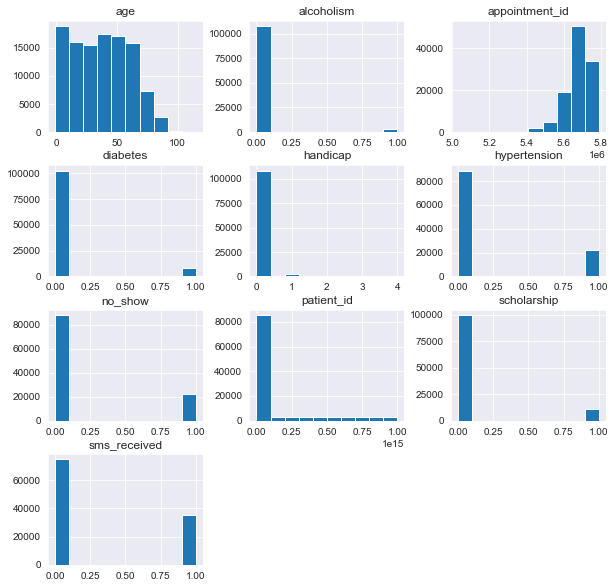

In [856]:
# let's graph each of the variable to see what they look like visually
df.hist(figsize = (10,10));

This is interesting: 
- 1) it reveals the most of the variables are binary, so either True or False
- 2) it reveals that there are a lot of young children that may need assistance from an adult in getting to the appointments
- 3) it appears that most people receveid a single tect message or don't receive any
- 4) there is a relatively small population that have one of the 4 pre-existing conditions

After seeing this, I think I am ready to start answering my questions. See below for analysis. 

### 1) Does receiveing text messages increase the likelihood of attendance?

I asked this question because to me this seemed like an obvious one that would influence attendance. 

In [857]:
# this give me some idea of what is the average text message sent
df.sms_received.mean() 

0.32102563174608917

Based on the number above, I cna tell that most people don't receive any text message, regardless of whether or not they show up.

In [858]:
# here I want to start visually see if receiving a text message influenes the no_show variable

mean = df['sms_received'].mean() #first, the figure out the mean sms_received like we did above
low_sms = df.query('sms_received < {}'.format(mean)) # create a dataframe with the entry below the mean 
high_sms = df.query('sms_received >= {}'.format(mean)) # create a dataframe with the entry above the mean

mean_quality_low = low_sms['no_show'].mean() # takes the mean of no_shows from the for low_sms dataframe
mean_quality_high = high_sms['no_show'].mean() # takes the mean of no_shows from the high_sms datafram

In [859]:
low_sms['no_show'].mean(), high_sms['no_show'].mean() # just to see what those last two lines are

(0.16703311346525418, 0.27574544839637)

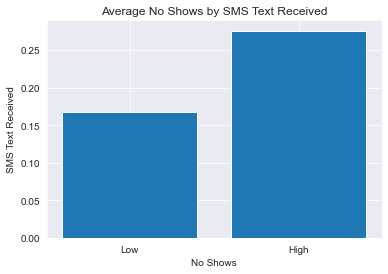

In [860]:
# Create a bar chart with labels
locations = [1, 2] 
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average No Shows by SMS Text Received')
plt.xlabel('No Shows')
plt.ylabel('SMS Text Received');

Based on these results, we can deduce that receiving a text message seems to negatively impact whether they no_show to an appointment. So reminding them doesn't work. I can tell becaue the mean of no_show in the group that receive above the mean sms messages is higher than the mean of no_shows from the group that received no sms texts. 

So sms_received is not a factor. Reasons for this could be accessibility to a cell phone. For example, I know in some developping countries a cell phone is shared by several members of family so the underlying assumption that the person who has an appointment always has access to a cellphone is potentially flawed. 

### 2) Does age play a factor when considering appointment attendance?

The question is important to ask because based on the histograms, it looks like a good majority of the entries might be young people who can't make it to the appointment without an adult. 
Below we will explore this question. 

In [861]:
#check to make sure all the age values are positive
df['age'].sort_values().unique()

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

Looks like there the is a negative value! Let's address that below

In [862]:
# this will take the negative values in the age column and impute the mean
df[df['age'] < 0] = df['age'].mean()

In [863]:
#check our work
df['age'].sort_values().unique().astype('int64')

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

Now that the age column was cleaned more, we are ready to continue the analysis. 

Text(0, 0.5, 'Count')

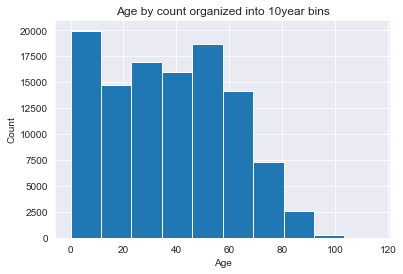

In [864]:
df.age.hist();
plt.title("Age by count organized into 10year bins")
plt.xlabel("Age")
plt.ylabel("Count")

In [865]:
# Labels for the four life stage groups
bin_names = ['child', 'adolescent', 'adult', 'senior']
# Bin edges that will be used to "cut" the data into the different lifestages by variable 'age'
bin_edges = [0, 13, 18, 60, 80]
# Creates new column lifestage with one of the 4 lifestage defined above
df['lifestage'] = pd.cut(df['age'], bin_edges, labels=bin_names)

# Check my work
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lifestage
0,2.987250e+13,5642903.0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,senior
1,5.589978e+14,5642503.0,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,adult
2,4.262962e+12,5642549.0,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,senior
3,8.679512e+11,5642828.0,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,child
4,8.841186e+12,5642494.0,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0.0,adult


Looks good! The lifestage columns was added successfully

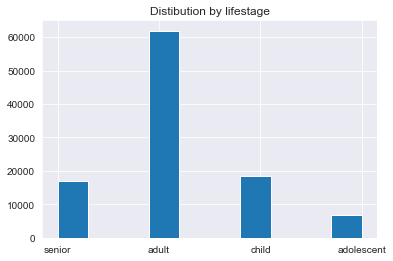

In [867]:
#since we have the lifestage variable now, let's take a look at it. 
df.lifestage.hist(); # this will show us the new ditribution based on lifestages. 
plt.title("Distibution by lifestage");

The majority of the people are adults, which means they probably can get to the appointements on their own, and they also probably have cell phones

In [868]:
# ok, at this point I feel comfortable that I understand enough about the data around this question
# let's try to answer the question
df.groupby('lifestage').no_show.size()

lifestage
child         18600
adolescent     6727
adult         61899
senior        16910
Name: no_show, dtype: int64

In [869]:
# this breakdows the number by no_show. 
# True == 1 which mean they no showed and False == 0 which means they show up
df.groupby(['lifestage','no_show']).size() 

lifestage   no_show  
child       0.000000     14629
            1.000000      3971
            37.088874        0
adolescent  0.000000      4990
            1.000000      1737
            37.088874        0
adult       0.000000     48932
            1.000000     12966
            37.088874        1
senior      0.000000     14373
            1.000000      2537
            37.088874        0
dtype: int64

Now we can examine the likelihood of each of these groups to no_show. It looks like adults mostly no show 
912,966 entries), indicating that children or seniors don't necessarily have a harder time getting to appointments.  

In [870]:
# I wanted to know what the percentage of no showed to showed up was
df.groupby('lifestage').mean().no_show 

lifestage
child         0.213495
adolescent    0.258213
adult         0.210069
senior        0.150030
Name: no_show, dtype: float64

This was simply to see if one value was skewed toward 0 or 1. Looks like in all lifestages, all the values are closer to 0. Which means about 21% of children, 26% of adolescents, 21% of adults, and 15% of senior did not show up. 

Based on these results, we can deduce that lifestage did not play a factor in whether they showed up to their appointment.

### Does a pre-existing condition influence attendance?

Since the data had 4 columns dedicated to pre-existing condition, I thought it woul dbe an obvious one to explaore. 

In [871]:
df_pre = df[['hypertension','diabetes','alcoholism', 'handicap']]

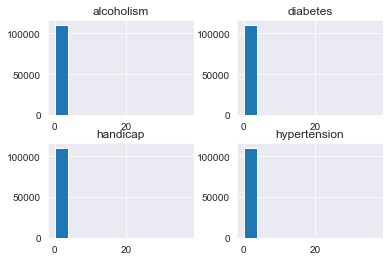

In [872]:
# let's quickly look to see how many of our sample have pre-existing conditions. 
# I want to look at how many pre-existing conditions people have in general
df_pre.hist();

In [873]:
# create a new column with the sum of the pre-existing condition dataframe
# this will tell us how many pre-existing condiitons each individual has in a new column
df['pre_existing'] = df_pre.sum(axis=1)

In [874]:
# check that it worked
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lifestage,pre_existing
0,2.987250e+13,5642903.0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,senior,1.0
1,5.589978e+14,5642503.0,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,adult,0.0
2,4.262962e+12,5642549.0,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,senior,0.0
3,8.679512e+11,5642828.0,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,child,0.0
4,8.841186e+12,5642494.0,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0.0,adult,2.0


In [875]:
# I want to know what the average pre-existing conditions for the dataset as a whole
df['pre_existing'].mean()

0.32310074006212897

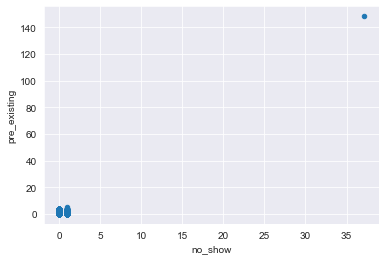

In [879]:
df.plot(x="no_show", y="pre_existing", kind="scatter");

Looks like we found a value that seems too high! I doubt someone has more than 140 prexisting conditions

In [880]:
# let's find what that value is
df['pre_existing'].sort_values().unique().astype('int64')

array([  0,   1,   2,   3,   4,   5, 148])

That value is 148, so let's change it in the code below

In [881]:
# I will simply remove the entry that seems wrong
df = df[df.pre_existing <= 5]

In [882]:
#check work 
df['pre_existing'].sort_values().unique().astype('int64')

array([0, 1, 2, 3, 4, 5])

Looks good so we can continue with the analysis. 

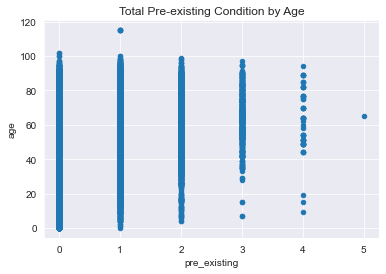

In [883]:
# let's plot pre-existing by age to see if the age will impact the rest of the analysis
df.plot(x="pre_existing", y="age", kind="scatter");
plt.title("Total Pre-existing Condition by Age");

This results confirm assumptions that the relationship between age and pre-existing is positive - in other words, as the sum of pre-existing conditions increase, so does age. 

However, we also see that have 1 or even 2 pre-existing conditions impact people of all ages. So we can safely exclude age from influencing pre-existing conditions as well. 

In [884]:
# check that it worked
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lifestage,pre_existing
0,2.987250e+13,5642903.0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,senior,1.0
1,5.589978e+14,5642503.0,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,adult,0.0
2,4.262962e+12,5642549.0,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,senior,0.0
3,8.679512e+11,5642828.0,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,child,0.0
4,8.841186e+12,5642494.0,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0.0,adult,2.0


In [885]:
# I want to know what the average pre-existing conditions for the dataset as a whole
df['pre_existing'].mean()

0.32176139550874905

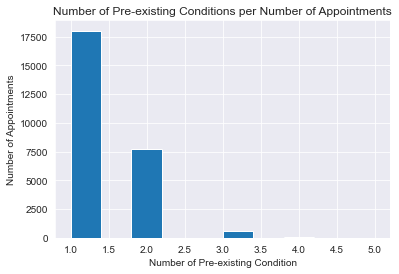

In [886]:
# now I want to know that if pre-existing is greater than 1, then they are they likely to show up at their appointment
pre_existing = df.query('pre_existing >= 1')
pre_existing.pre_existing.hist();
plt.title("Number of Pre-existing Conditions per Number of Appointments");
plt.xlabel("Number of Pre-existing Condition");
plt.ylabel("Number of Appointments");

Looks like most people have one condition, and 2 and 3 are other sums. 

In [887]:
df.groupby(['pre_existing','no_show']).size()

pre_existing  no_show
0.0           0.0        66511
              1.0        17603
1.0           0.0        14781
              1.0         3233
2.0           0.0         6346
              1.0         1364
3.0           0.0          518
              1.0          106
4.0           0.0           51
              1.0           12
5.0           1.0            1
dtype: int64

In [888]:
# this will tell me the percentage of no_show true for each group of pre-existing conditions. 
df.groupby('pre_existing').mean().no_show 

pre_existing
0.0    0.209276
1.0    0.179472
2.0    0.176913
3.0    0.169872
4.0    0.190476
5.0    1.000000
Name: no_show, dtype: float64

Based on the results, it does not look like pre-existing condition infleunce whether they show up at an appointment or not.

### Do any days of the week influence attendace? 

I thought this data woud be interesting to look at since most of the people who no showed were adults. Maybe they had other obligations such a job that took precendance over going to an appointment. 

In [904]:
# let's remind ourselves what the data looks like
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lifestage,pre_existing,appt_weekday
0,2.987250e+13,5642903.0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,senior,1.0,4
1,5.589978e+14,5642503.0,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,adult,0.0,4
2,4.262962e+12,5642549.0,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,senior,0.0,4
3,8.679512e+11,5642828.0,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,child,0.0,4
4,8.841186e+12,5642494.0,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0.0,adult,2.0,4


In [905]:
# let's create a new column with the day of the week based on the appointment_id variable
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df['appt_weekday'] = df['appointment_day'].dt.dayofweek

<ipython-input-905-2df49cdcc40a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['appointment_day'] = pd.to_datetime(df['appointment_day'])
<ipython-input-905-2df49cdcc40a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['appt_weekday'] = df['appointment_day'].dt.dayofweek


The above is throwing an error but it's still adding the column as intended...so I'm moving on

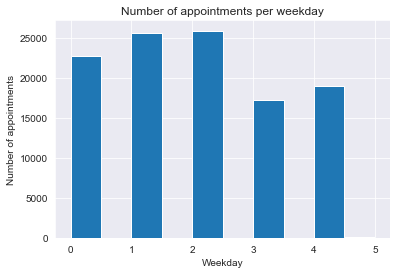

In [906]:
# let's take a look at the distribution of appointment of the week for the entire data. 
data1 = df.appt_weekday.hist();
plt.title("Number of appointments per weekday");
plt.xlabel("Weekday");
plt.ylabel("Number of appointments");

More appointments were schedule earlier in the week, with Thursday having the lowest for some reason. 

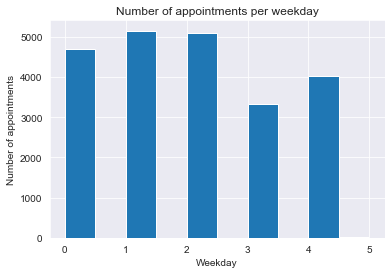

In [907]:
#let's create the same graph as above but without the entries that showed up to their appointment
df2 = df[(df.no_show == 1)]
data2 = df2.appt_weekday.hist();
plt.title("Number of appointments per weekday");
plt.xlabel("Weekday");
plt.ylabel("Number of appointments");

This shows that no_shows are pretty much the same as the appointment scheduling. 

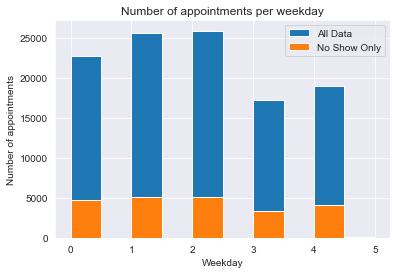

In [908]:
# now let's combine the histograms just to confirm
data1 = df.appt_weekday.hist(label="All Data");
data2 = df2.appt_weekday.hist(label="No Show Only");
plt.legend(loc="upper right");
plt.title("Number of appointments per weekday");
plt.xlabel("Weekday");
plt.ylabel("Number of appointments");

Based on this last histogram, it doesn't appear as there is a relationship with the day of the week and attendance. 

<a id='conclusions'></a>
## Conclusions

None of my questions helped in answering the paramount question about which fators influence attendance to appointments. It actually seems to open the door to more questions...Neither day of the week, age, and a pre-existing condition influence the independent variable 'no_show'. It's also possible that the variable needed to answer the question is not present in the dataset. 

In order to move forward, I would need to further look at some of the other variables to explore. Other questions could be:
- Does sex play a role? taking a look at whether men or women no_show more often. 
- Does the neighborhood from which they come from influence? Maybe distance plays a role. 
- The variable scholarship wasn't explored, so understanding this one might be worth it. 

In [555]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

In [714]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,lifestage,pre_existing,appt_weekday
0,2.987250e+13,5642903.0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,senior,1.0,4
1,5.589978e+14,5642503.0,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,adult,0.0,4
2,4.262962e+12,5642549.0,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,senior,0.0,4
3,8.679512e+11,5642828.0,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,child,0.0,4
4,8.841186e+12,5642494.0,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0.0,adult,2.0,4


AttributeError: 'PathCollection' object has no property 'columns'